# First break picking datasets

# Content

* [Dataset 1](#Dataset-1)   
* [Dataset 2](#Dataset-2)   
* [Dataset 3](#Dataset-3)  

## Dataset 1

Dataset consists of a raw field seismograms and corresponding first break pickings.   
Dataset is split into training and validation parts.

** Train **

| Segy file | Picking file | N ffid | N traces |
| :------ | ----: | ----: | ----: |
| Pal_Flatiron_1k.sgy | Pal_Flatiron_1k_picking.csv | 1001 | from 381 to 852 |

** Validation **

| Segy file | Picking file | N ffid | N traces |
| :------ | ----: | ----: | ----: |
| Pal_Flatiron_1k_val.sgy | Pal_Flatiron_1k_val_picking.csv | 501 | from 381 to 852 |

Below we show sample trace headers and sample seismogram with picking from the train dataset.   
Sample trace headers:

In [1]:
import sys
sys.path.append('..')

from seismicpro.batchflow import Dataset#, Pipeline, B, V, F

from seismicpro.src import (SeismicBatch, FieldIndex, TraceIndex,
                            seismic_plot)

path_raw = '/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy'
index = (FieldIndex(name='raw', path=path_raw, 
                    markup_path='/notebooks/egor/FB/Pal/Pal_Flatiron_1k_picking.csv'))
index.head()

,FIRST_BREAK_TIME,TraceNumber,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw
FieldRecord,,,,
10407,77.291588,1956,1,/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy
10407,75.197472,1957,2,/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy
10407,95.463326,1955,3,/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy
10407,96.654495,1958,4,/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy
10407,114.333763,1954,5,/notebooks/egor/FB/Pal/Pal_Flatiron_1k.sgy


Total number of field records and traces:

In [2]:
len(index), sum(index.tracecounts)

(1001, 754986)

Number of traces in Field Records varies in range:

In [3]:
df = TraceIndex(index)._idf
df.groupby(by=['FieldRecord']).size().min(), df.groupby(by=['FieldRecord']).size().max()

(381, 852)

Sample seismogram and picking.

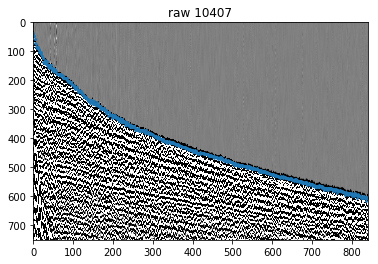

In [4]:
cv = 1000
batch = (Dataset(index, SeismicBatch).next_batch(batch_size=1)
         .load(components='raw', fmt='segy')
         .load(components='markup', fmt='picks')
         .seismic_plot(src='raw', index=index.indices[0], cmap='gray', vmin=-cv, vmax=cv, s=3,
                       src_picking='markup'))

## Dataset 2

Dataset consists of a raw field seismograms and corresponding pickings.   
Dataset is split into training and validation parts.

In this dataset only traces with **offset < 1400** have labels.

** Train **

| Segy file | Picking file | N ffid | N traces |
| :------ | ----: | ----: | ----: |
| WZ_Flatiron_1k.sgy | WZ_Flatiron_1k_picking.csv | 1001 | from 417 to 844 |

** Validatoin **

| Segy file | Picking file | N ffid | N traces |
| :------ | ----: | ----: | ----: |
| WZ_Flatiron_1k_val.sgy | WZ_Flatiron_1k_val_picking.csv | 1001 | from 417 to 844 |

Below we show sample trace headers and sample seismogram with picking from the train dataset.   
Sample trace headers:

In [5]:
path_raw = '/notebooks/egor/FB/WZ/WZ_Flatiron_1k.sgy'
index = (FieldIndex(name='raw', path=path_raw, 
                    markup_path='/notebooks/egor/FB/WZ/WZ_Flatiron_1k_picking.csv'))
index.head()

,FIRST_BREAK_TIME,TraceNumber,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw
FieldRecord,,,,
3125,67.0,448,1,/notebooks/egor/FB/WZ/WZ_Flatiron_1k.sgy
3125,82.0,447,2,/notebooks/egor/FB/WZ/WZ_Flatiron_1k.sgy
3125,112.0,446,3,/notebooks/egor/FB/WZ/WZ_Flatiron_1k.sgy
3125,137.0,445,4,/notebooks/egor/FB/WZ/WZ_Flatiron_1k.sgy
3125,172.0,392,5,/notebooks/egor/FB/WZ/WZ_Flatiron_1k.sgy


Total number of field records and traces:

In [6]:
len(index), sum(index.tracecounts)

(1001, 794185)

Number of traces in Field Records varies in range:

In [7]:
df = TraceIndex(index)._idf
df.groupby(by=['FieldRecord']).size().min(), df.groupby(by=['FieldRecord']).size().max()

(417, 844)

Sample seismogram and picking.

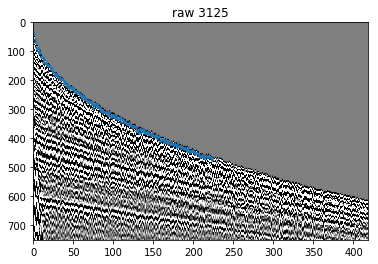

In [8]:
batch = (Dataset(index, SeismicBatch).next_batch(batch_size=1)
         .load(components='raw', fmt='segy')
         .load(components='markup', fmt='picks')
         .seismic_plot(src='raw', index=index.indices[0], cmap='gray',vmin=-1,vmax=1, s=3,
                       src_picking='markup'))

In this dataset only traces with offsets < 1400 have labels.

## Dataset 3

Dataset consists of a raw field seismograms and corresponding pickings.   
Dataset is split into training and validation parts.

** Train **

| Segy file | Picking file | N ffid | N traces |
| :------ | ----: | ----: | ----: |
| 3_FBP_1k-ffid_3s.sgy | 3_FBP_1k-ffid_3s.sgy_picking.csv | 460 | from 129 to 140 |

** Validation **

| Segy file | Picking file | N ffid | N traces |
| :------ | ----: | ----: | ----: |
| 3_FBP_1k-ffid_3s_val.sgy | 3_FBP_1k-ffid_3s.sgy_val_picking.csv | 230 | from 129 to 140 |

Below we show sample trace headers and sample seismogram with picking from the train dataset.   
Sample trace headers:

In [9]:
path_raw = '/notebooks/egor/FB/Vor/3_FBP_1k-ffid_3s.sgy'
index = (FieldIndex(name='raw', path=path_raw, 
                    markup_path='/notebooks/egor/FB/Vor/3_FBP_1k-ffid_3s_picking.csv'))
index.head()

,FIRST_BREAK_TIME,TraceNumber,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw
FieldRecord,,,,
143033,96,1141,1,/notebooks/egor/FB/Vor/3_FBP_1k-ffid_3s.sgy
143033,83,1140,2,/notebooks/egor/FB/Vor/3_FBP_1k-ffid_3s.sgy
143033,133,1139,3,/notebooks/egor/FB/Vor/3_FBP_1k-ffid_3s.sgy
143033,171,1142,4,/notebooks/egor/FB/Vor/3_FBP_1k-ffid_3s.sgy
143033,166,1138,5,/notebooks/egor/FB/Vor/3_FBP_1k-ffid_3s.sgy


Total number of field records and traces:

In [10]:
len(index), sum(index.tracecounts)

(460, 61857)

Number of traces in Field Records varies in range:

In [11]:
df = TraceIndex(index)._idf
df.groupby(by=['FieldRecord']).size().min(), df.groupby(by=['FieldRecord']).size().max()

(129, 140)

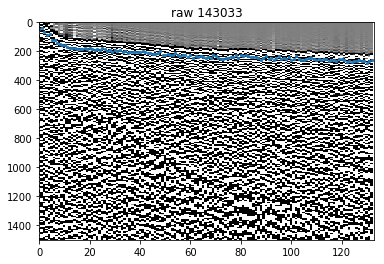

In [12]:
batch = (Dataset(index, SeismicBatch).next_batch(batch_size=10)
         .load(components='raw', fmt='segy')
         .load(components='markup', fmt='picks')
         .seismic_plot(src='raw', index=index.indices[0], cmap='gray',vmin=-100,vmax=100, s=5,
                       src_picking='markup'))